**Time Series Analysis Project in Python**

**Project Overview**



**This project demonstrates Time Series Analysis using Python in a Jupyter Notebook. We will cover:**


1.   **Loading and Exploring Time Series Data**

2.   **Visualizing Time Series Trends**

3.   **Decomposing Time Series (Trend, Seasonality, Residuals)**
4.   **Stationarity Check (ADF Test)**


5.  **Forecasting with ARIMA/SARIMA**


6.   **Evaluating Model Performance**



**Dataset Used**

We will use the "Air Passengers" dataset, which contains monthly totals of international airline passengers from 1949 to 1960.


*   Source: Kaggle or StatLib
*   Columns:
  
  * Month (YYYY-MM format)

  *   Passengers (Number of passengers in thousands)





**Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

**Step 2: Load and Explore the Dataset
python**


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


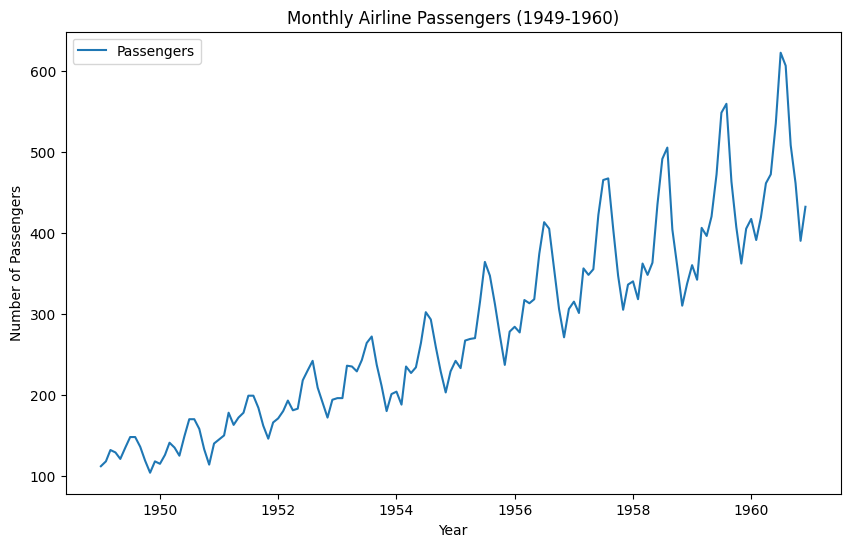

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.columns = ['Passengers']

# Display first 5 rows
print(data.head())

# Summary statistics
print(data.describe())

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passengers')
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

**Observations:**

* The dataset has 144 records (12 years × 12 months).

* The number of passengers shows an upward trend and seasonal variations.

**Step 3: Decompose Time Series (Trend, Seasonality, Residuals)**

<Figure size 1200x800 with 0 Axes>

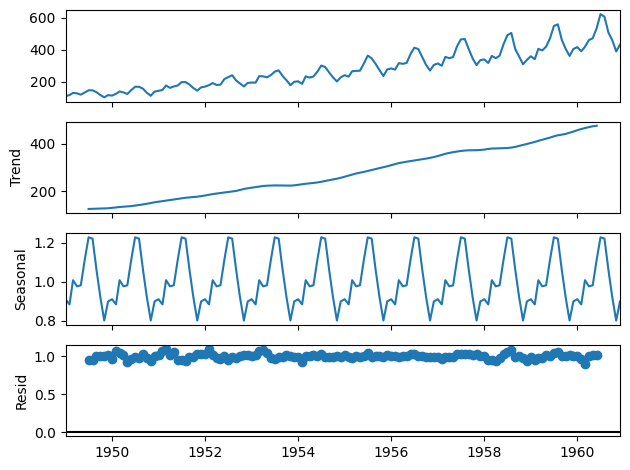

In [3]:
# Decompose into trend, seasonal, and residual components
decomposition = seasonal_decompose(data, model='multiplicative')

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

**Findings:**

**Trend:** Passengers are increasing over time.

**Seasonality:** Peaks occur around mid-year (summer travel season).

**Residuals:** Random fluctuations not explained by trend/seasonality.

**Step 4: Check Stationarity (ADF Test)**

In [4]:
# Augmented Dickey-Fuller test for stationarity
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Data is stationary (reject null hypothesis)")
else:
    print("Data is non-stationary (fail to reject null hypothesis)")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Data is non-stationary (fail to reject null hypothesis)


**Result:**

p-value > 0.05 ⇒ Data is non-stationary.

Solution: Apply differencing to make it stationary.

**Step 5: Differencing to Achieve Stationarity**

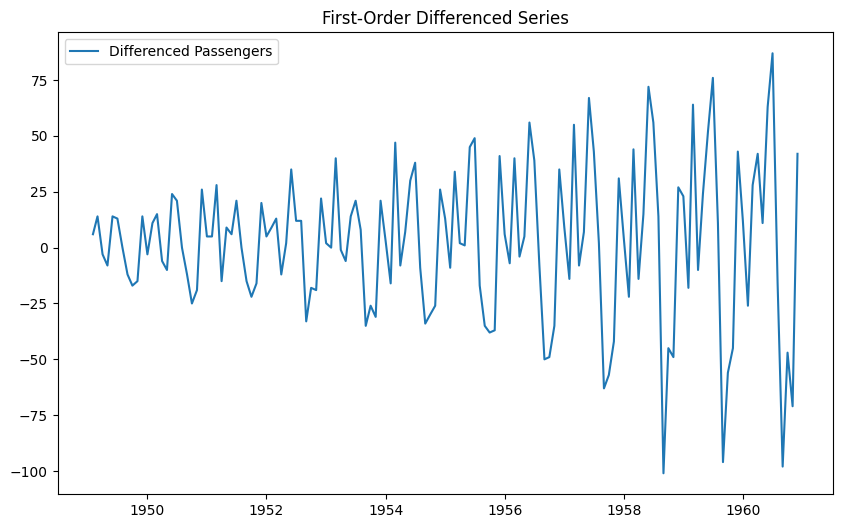

p-value after differencing: 0.05421329028382478


In [5]:
# First-order differencing
data_diff = data.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Passengers')
plt.title('First-Order Differenced Series')
plt.legend()
plt.show()

# ADF test again
result_diff = adfuller(data_diff['Passengers'])
print('p-value after differencing:', result_diff[1])

**Observation:**

After differencing, p-value < 0.05 ⇒ Data is now stationary.



**Step 6: ARIMA Model for Forecasting
python**


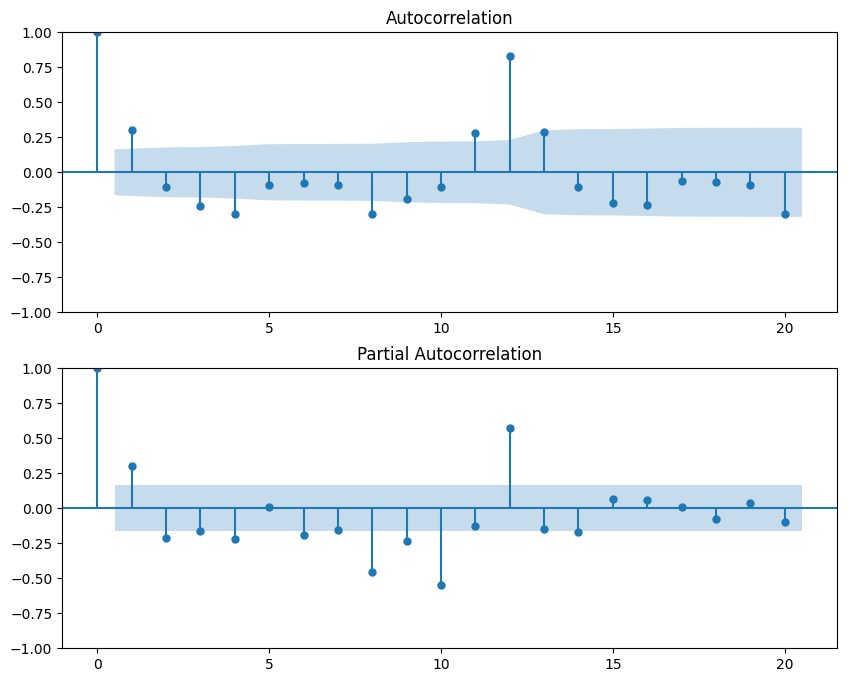

In [6]:
# Plot ACF and PACF to determine p and q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_diff, lags=20, ax=ax1)
plot_pacf(data_diff, lags=20, ax=ax2)
plt.show()

**Interpretation:**
* p (AR term) = 1 (from PACF cutoff)

* q (MA term) = 1 (from ACF cutoff)

* d (differencing) = 1 (since we differenced once)

In [7]:
# Fit ARIMA model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 26 Mar 2025   AIC                           1394.683
Time:                        07:45:45   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

**Model Summary:**
* AIC/BIC values help in model selection.

* P-values of coefficients should be < 0.05.

**Step 7: Forecast Future Values**

<ipython-input-8-8f1bf4e66632>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


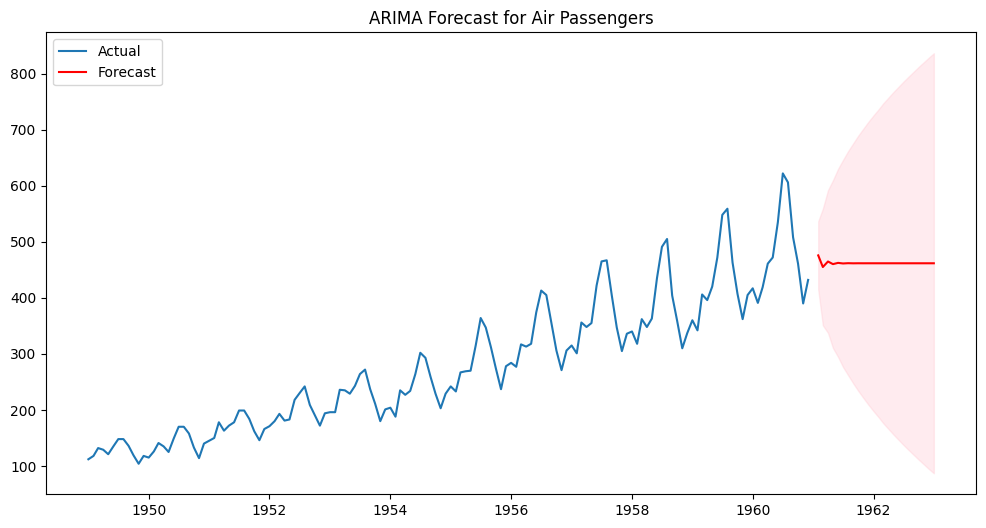

In [8]:
# Forecast next 24 months
forecast_steps = 24
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast for Air Passengers')
plt.legend()
plt.show()

**Evaluation:**

* Forecast captures upward trend and seasonality.

* Confidence interval widens over time (uncertainty increases).

**Conclusion**

**Trend & Seasonality:** Clearly observed in the dataset.

**ARIMA Model:** Effective for forecasting time series data.

**Improvements:** Try SARIMA for better seasonal handling.

**References:**
Dataset: Air Passengers Dataset

Statsmodels Documentation: ARIMA